# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.
1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parso.python.tokenize import group
from scipy.stats import ttest_ind, mannwhitneyu
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

importando o dataframe

In [99]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


imprimindo as colunas

In [100]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [102]:
# Configura o tamanho da figura
plt.rc('figure', figsize=(10, 25))

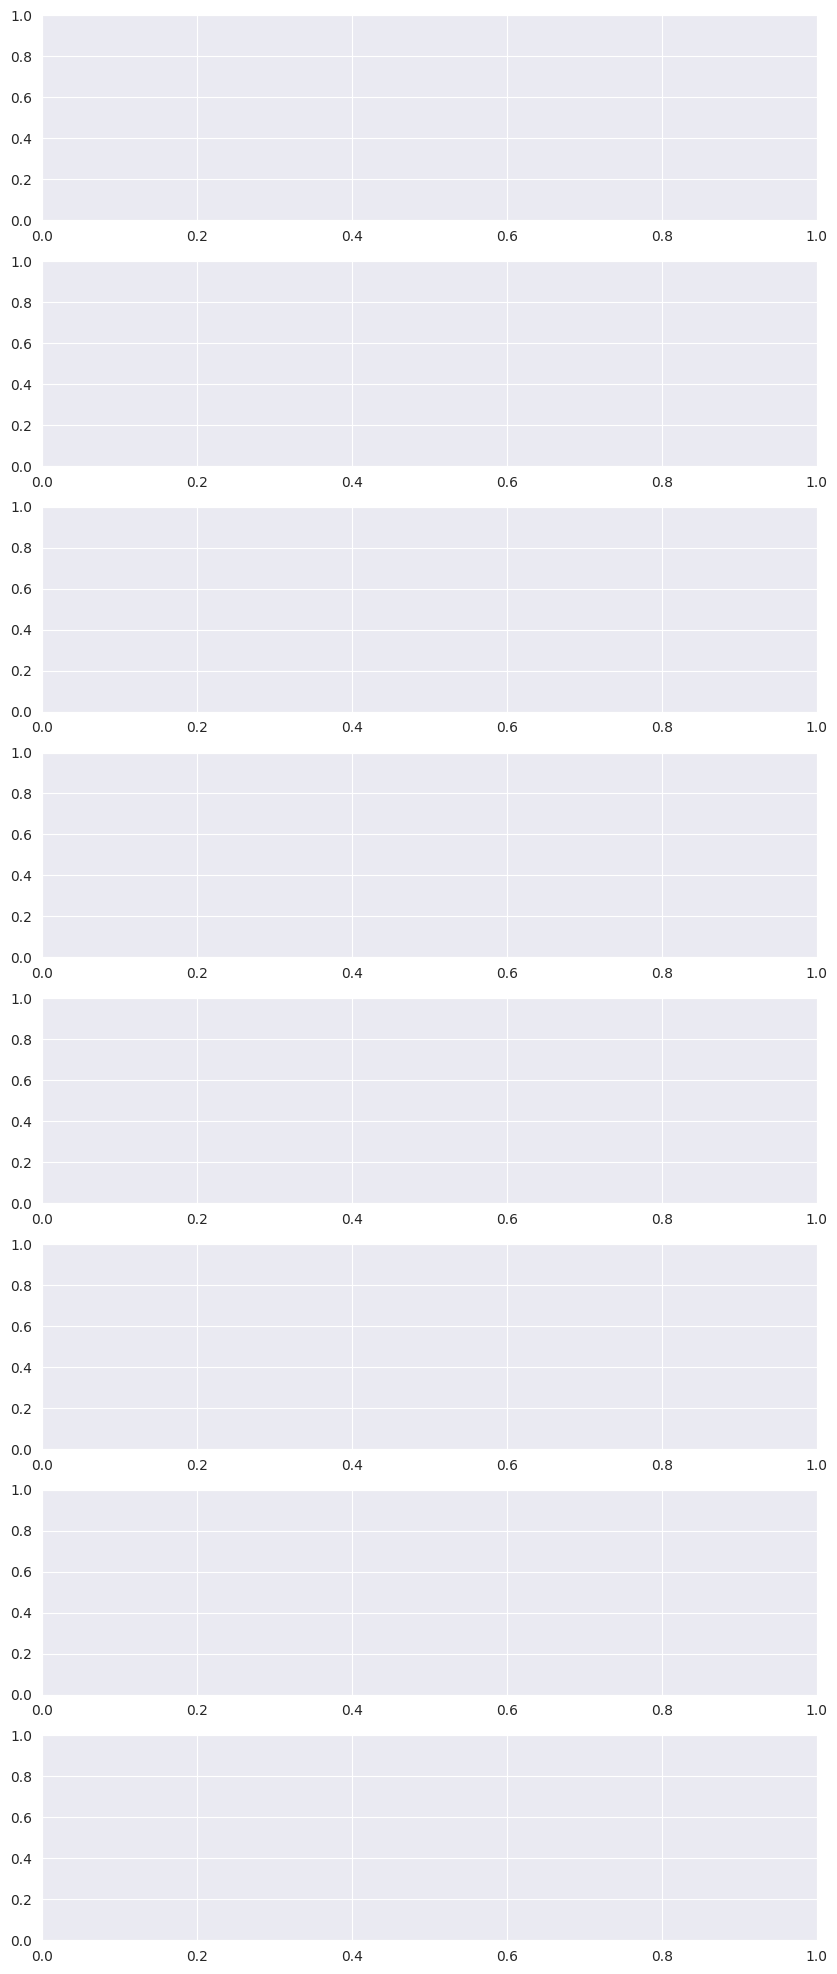

In [103]:
# Cria subplots com 8 linhas e 1 coluna
fig, axes = plt.subplots(8, 1)

In [106]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['sexo']
grupo_veiculo = df.groupby('posse_de_veiculo')['sexo']

In [107]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - Posse de imovel:")
print(grupo_imovel.describe())

Estatisticas descritivas - Posse de imovel:
                 count unique top  freq
posse_de_imovel                        
False             4918      2   F  3188
True             10082      2   F  6979


In [108]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                 count unique top  freq
posse_de_veiculo                       
False             9167      2   F  7489
True              5833      2   M  3155


In [109]:
# COUNTPLOT DA VARIÁVEL SEXO

sns.countplot(ax=axes[0], x='data_ref', hue='sexo', data=df)
axes[0].set_title('Sexo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel('Contagem')
axes[0].set_xlabel('Data')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='best', title='Legenda:')


/tmp/ipykernel_7117/3973434736.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [110]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['posse_de_veiculo']
grupo_veiculo = df.groupby('posse_de_veiculo')['posse_de_veiculo']

In [111]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - :")
print(grupo_imovel.describe())

Estatisticas descritivas - :
                 count unique    top  freq
posse_de_imovel                           
False             4918      2  False  2955
True             10082      2  False  6212


In [112]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                 count unique    top  freq
posse_de_veiculo                          
False             9167      1  False  9167
True              5833      1   True  5833


In [113]:
# COUNTPLOT DA VARIÁVEL POSSE_DE_VEICULO

sns.countplot(ax=axes[1], x='data_ref', hue='posse_de_veiculo', data=df)
axes[1].set_title('Veículo')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel('Contagem')
axes[1].set_xlabel('Data')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='best', title='Legenda:')

/tmp/ipykernel_7117/908400866.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


In [114]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['posse_de_imovel']
grupo_veiculo = df.groupby('posse_de_veiculo')['posse_de_imovel']

In [115]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - Posse de imovel:")
print(grupo_imovel.describe())

Estatisticas descritivas - Posse de imovel:
                 count unique    top   freq
posse_de_imovel                            
False             4918      1  False   4918
True             10082      1   True  10082


In [116]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                 count unique   top  freq
posse_de_veiculo                         
False             9167      2  True  6212
True              5833      2  True  3870


In [117]:
# COUNTPLOT DA VARIÁVEL POSSE_DE_IMOVEL

sns.countplot(ax=axes[2], x='data_ref', hue='posse_de_imovel', data=df)
axes[2].set_title('Imóvel')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylabel('Contagem')
axes[2].set_xlabel('Data')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='best', title='Legenda:')

/tmp/ipykernel_7117/2205968796.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


In [118]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['tipo_renda']
grupo_veiculo = df.groupby('posse_de_veiculo')['tipo_renda']

In [119]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - Posse de imovel:")
print(grupo_imovel.describe())

Estatisticas descritivas - Posse de imovel:
                 count unique          top  freq
posse_de_imovel                                 
False             4918      4  Assalariado  2734
True             10082      5  Assalariado  5092


In [120]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                 count unique          top  freq
posse_de_veiculo                                
False             9167      5  Assalariado  4541
True              5833      4  Assalariado  3285


In [121]:
# COUNTPLOT DA VARIÁVEL TIPO_RENDA

sns.countplot(ax=axes[3], x='data_ref', hue='tipo_renda', data=df)
axes[3].set_title('Renda')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_ylabel('Contagem')
axes[3].set_xlabel('Data')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='best', title='Legenda:')

/tmp/ipykernel_7117/217469204.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)


In [122]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['educacao']
grupo_veiculo = df.groupby('posse_de_veiculo')['educacao']

In [123]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - Posse de imovel:")
print(grupo_imovel.describe())

Estatisticas descritivas - Posse de imovel:
                 count unique         top  freq
posse_de_imovel                                
False             4918      4  Secundário  2907
True             10082      5  Secundário  6020


In [124]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                 count unique         top  freq
posse_de_veiculo                               
False             9167      5  Secundário  5793
True              5833      5  Secundário  3134


In [125]:
# COUNTPLOT DA VARIÁVEL EDUCACAO

sns.countplot(ax=axes[4], x='data_ref', hue='educacao', data=df)

axes[4].set_title('Educação')
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)
axes[4].set_ylabel('Contagem')
axes[4].set_xlabel('Data')
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='best', title='Legenda:')

# Ajuste automático do espaçamento entre os gráficos
plt.tight_layout()

/tmp/ipykernel_7117/3011254101.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)


<Figure size 1000x2500 with 0 Axes>

.02) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [17]:
# Configura o tamanho da figura
plt.rc('figure', figsize=(10, 30))

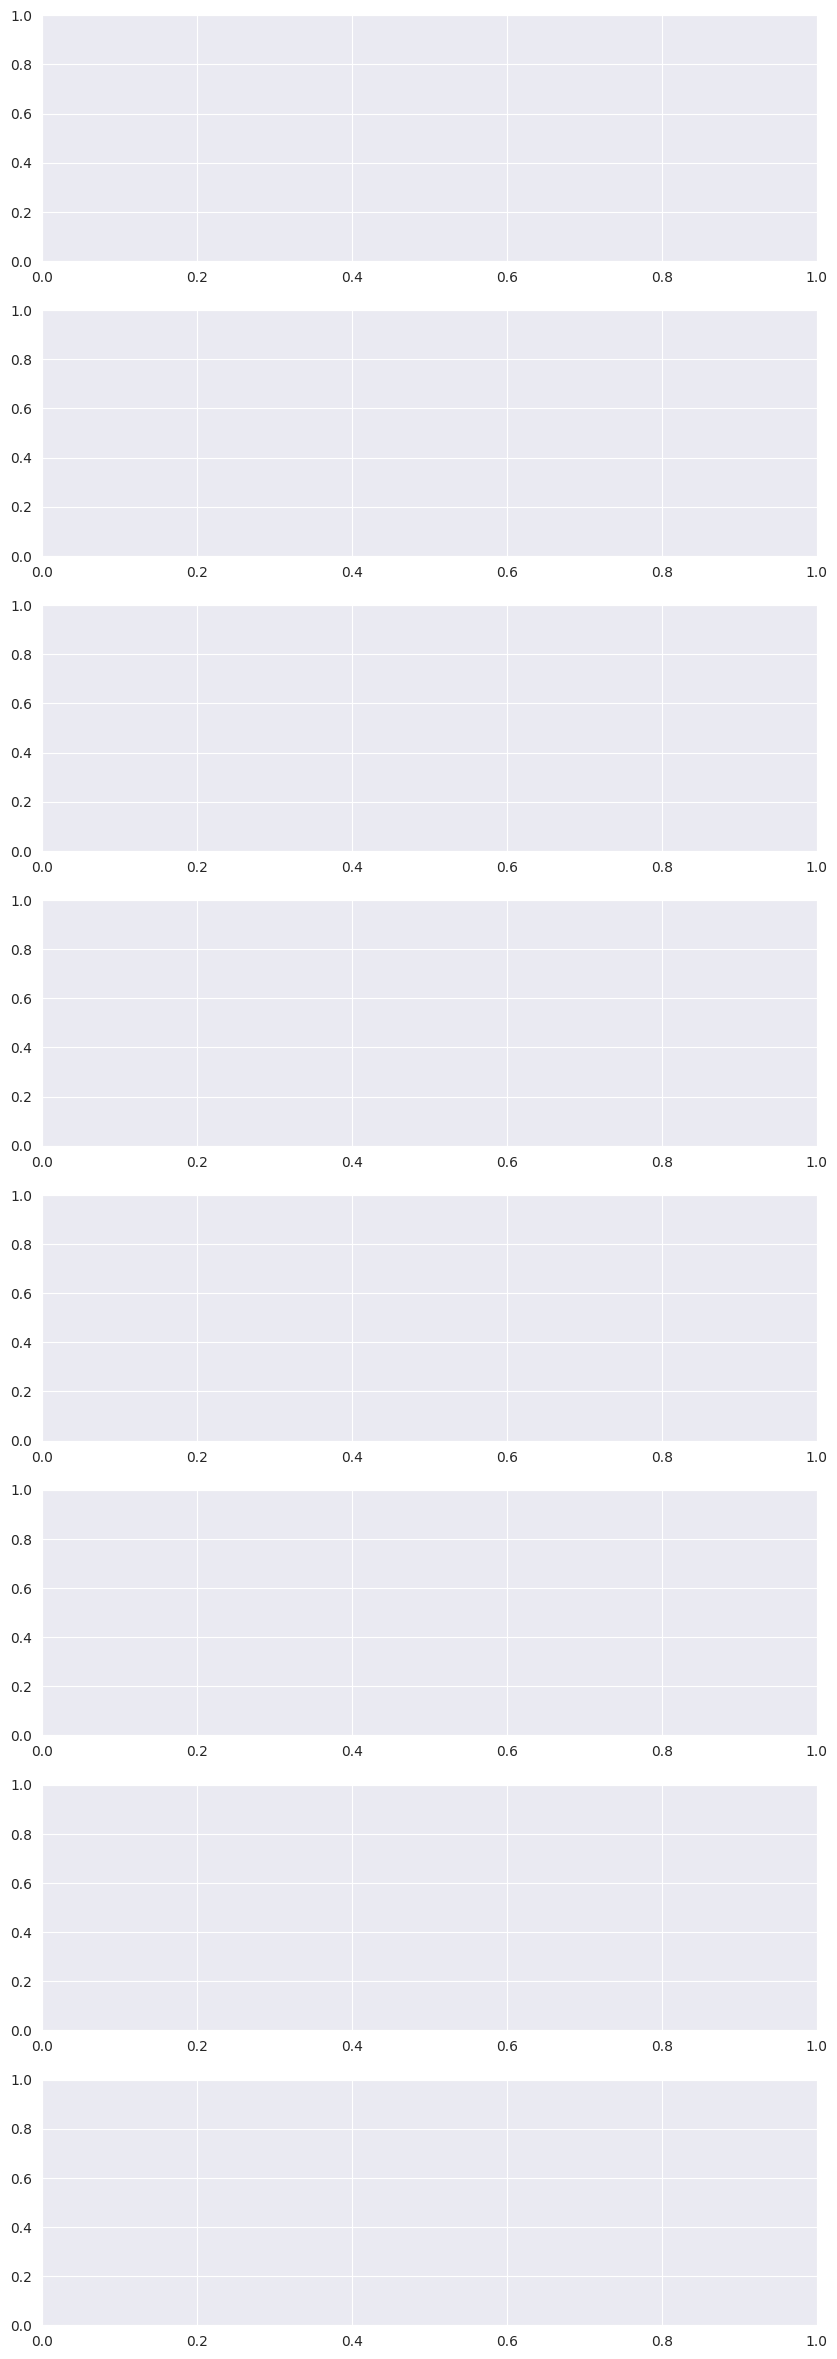

In [18]:
# Cria subplots com 8 linhas e 1 coluna
fig, axes = plt.subplots(8, 1)

In [132]:
numeric_data = df.select_dtypes(include="number")

In [138]:
# Calcular a correlação de todas as variáveis numéricas com a variável 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [139]:
# Exibir as duas variáveis mais correlacionadas (excluindo 'renda' que possui correlação 1.0 com ela mesma)
top_two_variables = correlation_with_renda.index[1:3]  # Índice 0 é 'renda' (corr = 1.0)

In [140]:
# Exibir as duas variáveis mais correlacionadas
print("As duas variáveis mais correlacionadas com renda são:")
print(top_two_variables)

As duas variáveis mais correlacionadas com renda são:
Index(['tempo_emprego', 'idade'], dtype='object')


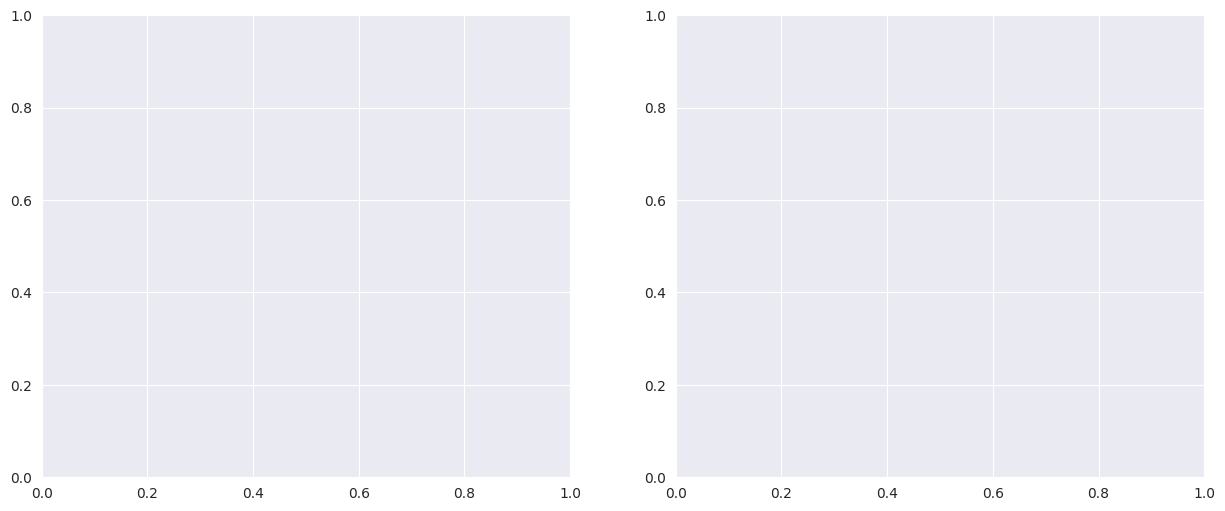

In [141]:
# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Um layout de 1 linha e 2 colunas

In [142]:
# Pointplot da variável sexo
sns.pointplot(ax=axes[0], x='data_ref', y='renda', hue='sexo', data=df, dodge=True, errorbar=('ci', 95))
axes[0].set_title('Renda por Sexo ao Longo do Tempo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Renda Média')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')

/tmp/ipykernel_7117/466708006.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [143]:
# Substitua o segundo gráfico com outra análise (exemplo: renda por idade)
sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')
axes[1].set_title('Renda por Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Renda Média')

/tmp/ipykernel_7117/415357461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')


Text(638.5353535353535, 0.5, 'Renda Média')

In [144]:
# Layout ajustado
plt.tight_layout()
plt.show()

<Figure size 1000x2500 with 0 Axes>

In [ ]:
# Selecionar variáveis numéricas do DataFrame
numeric_data = df.select_dtypes(include="number")

In [146]:
# Calcular a correlação de todas as variáveis numéricas com a variável 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [147]:
# Exibir as duas variáveis mais correlacionadas (excluindo 'renda' que possui correlação 1.0 com ela mesma)
top_two_variables = correlation_with_renda.index[1:3]  # Índice 0 é 'renda' (corr = 1.0)

In [148]:
# Exibir as duas variáveis mais correlacionadas
print("As duas variáveis mais correlacionadas com renda são:")
print(top_two_variables)


As duas variáveis mais correlacionadas com renda são:
Index(['tempo_emprego', 'idade'], dtype='object')


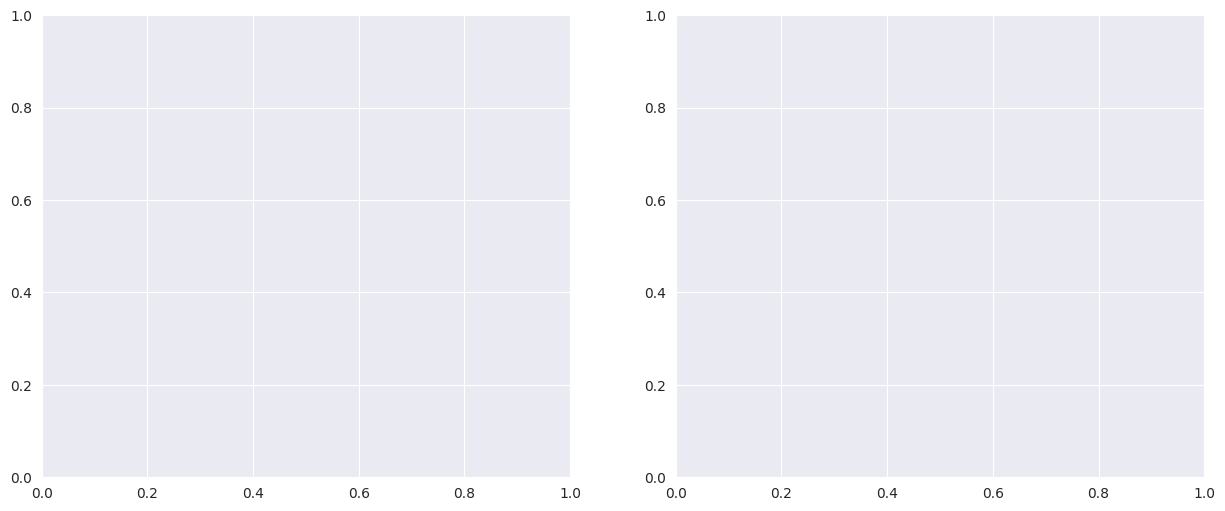

In [149]:
# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Um layout de 1 linha e 2 colunas

In [150]:
# POINTPLOT DA VARIÁVEL POSSE_DE_VEICULO
sns.pointplot(ax=axes[0], x='data_ref', y='renda', hue='posse_de_veiculo', data=df, dodge=True, errorbar=('ci', 95))
axes[0].set_title('Renda por pose_de_veiculo ao Longo do Tempo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Renda Média')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')

/tmp/ipykernel_7117/1301478887.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [151]:
# Substitua o segundo gráfico com outra análise (exemplo: renda por idade)
sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')
axes[1].set_title('Renda por Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Renda Média')

/tmp/ipykernel_7117/415357461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')


Text(638.5353535353535, 0.5, 'Renda Média')

In [152]:
# Layout ajustado
plt.tight_layout()
plt.show()

<Figure size 1000x2500 with 0 Axes>

In [153]:
# Selecionar variáveis numéricas do DataFrame
numeric_data = df.select_dtypes(include="number")

In [154]:
# Calcular a correlação de todas as variáveis numéricas com a variável 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [155]:
# Exibir as duas variáveis mais correlacionadas (excluindo 'renda' que possui correlação 1.0 com ela mesma)
top_two_variables = correlation_with_renda.index[1:3]  # Índice 0 é 'renda' (corr = 1.0)

In [156]:
# Exibir as duas variáveis mais correlacionadas
print("As duas variáveis mais correlacionadas com renda são:")
print(top_two_variables)

As duas variáveis mais correlacionadas com renda são:
Index(['tempo_emprego', 'idade'], dtype='object')


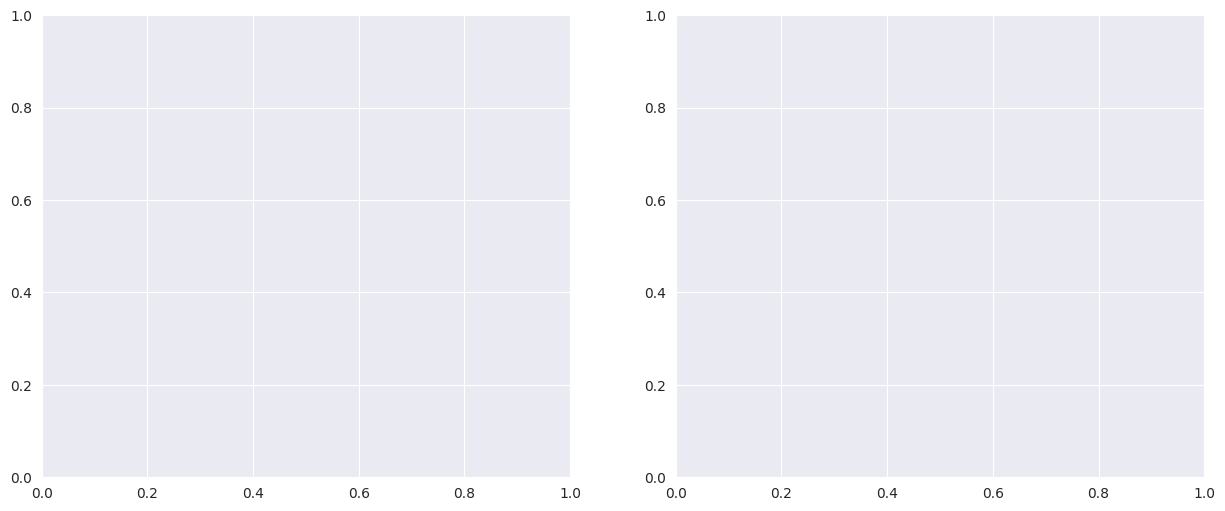

In [157]:
# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Um layout de 1 linha e 2 colunas

In [158]:
# POINTPLOT DA VARIÁVEL POSSE_DE_IMOVEL

# Pointplot da variável sexo
sns.pointplot(ax=axes[0], x='data_ref', y='renda', hue='posse_de_imovel', data=df, dodge=True, errorbar=('ci', 95))
axes[0].set_title('Renda por Sexo ao Longo do Tempo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Renda Média')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')

/tmp/ipykernel_7117/895345954.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [159]:
# Substitua o segundo gráfico com outra análise (exemplo: renda por idade)
sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')
axes[1].set_title('Renda por Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Renda Média')


/tmp/ipykernel_7117/3346785780.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')


Text(638.5353535353535, 0.5, 'Renda Média')

In [161]:
# Layout ajustado
plt.tight_layout()
plt.show()


<Figure size 1000x2500 with 0 Axes>

In [162]:
# Selecionar variáveis numéricas do DataFrame
numeric_data = df.select_dtypes(include="number")

In [163]:
# Calcular a correlação de todas as variáveis numéricas com a variável 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [164]:
# Exibir as duas variáveis mais correlacionadas (excluindo 'renda' que possui correlação 1.0 com ela mesma)
top_two_variables = correlation_with_renda.index[1:3]  # Índice 0 é 'renda' (corr = 1.0)

In [165]:
# Exibir as duas variáveis mais correlacionadas
print("As duas variáveis mais correlacionadas com renda são:")
print(top_two_variables)


As duas variáveis mais correlacionadas com renda são:
Index(['tempo_emprego', 'idade'], dtype='object')


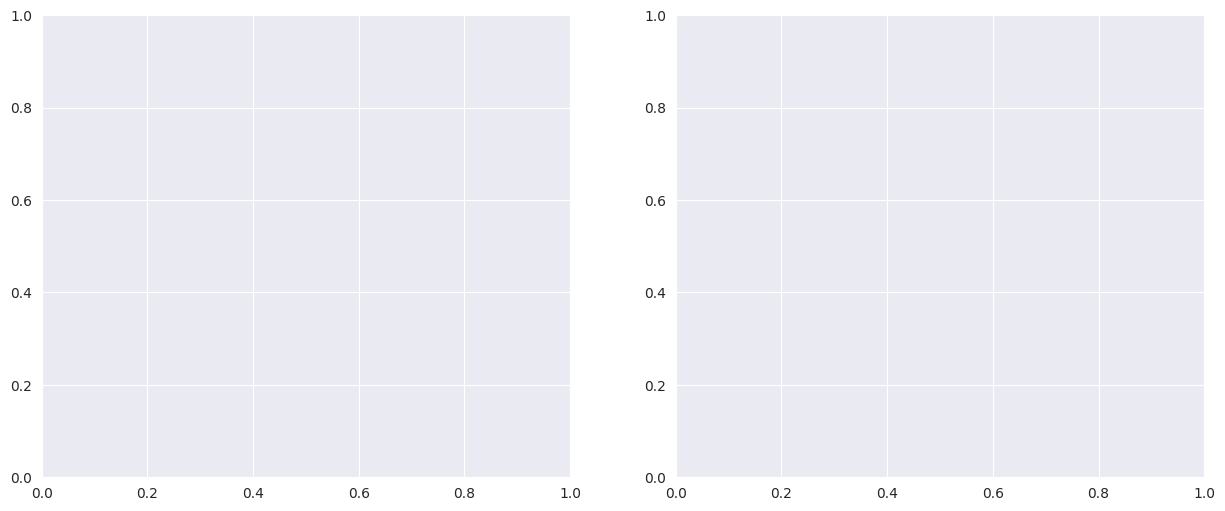

In [166]:
# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Um layout de 1 linha e 2 colunas

In [167]:
# POINTPLOT DA VARIÁVEL TIPO_RENDA
# Pointplot da variável sexo
sns.pointplot(ax=axes[0], x='data_ref', y='renda', hue='tipo_renda', data=df, dodge=True, errorbar=('ci', 95))
axes[0].set_title('Renda por Sexo ao Longo do Tempo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Renda Média')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')

/tmp/ipykernel_7117/987074009.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [168]:
# Substitua o segundo gráfico com outra análise (exemplo: renda por idade)
sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')
axes[1].set_title('Renda por Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Renda Média')

/tmp/ipykernel_7117/415357461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')


Text(638.5353535353535, 0.5, 'Renda Média')

In [169]:
# Layout ajustado
plt.tight_layout()
plt.show()

<Figure size 1000x2500 with 0 Axes>

In [170]:
# Selecionar variáveis numéricas do DataFrame
numeric_data = df.select_dtypes(include="number")

In [171]:
# Calcular a correlação de todas as variáveis numéricas com a variável 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [172]:
# Exibir as duas variáveis mais correlacionadas (excluindo 'renda' que possui correlação 1.0 com ela mesma)
top_two_variables = correlation_with_renda.index[1:3]  # Índice 0 é 'renda' (corr = 1.0)

In [173]:
# Exibir as duas variáveis mais correlacionadas
print("As duas variáveis mais correlacionadas com renda são:")
print(top_two_variables)

As duas variáveis mais correlacionadas com renda são:
Index(['tempo_emprego', 'idade'], dtype='object')


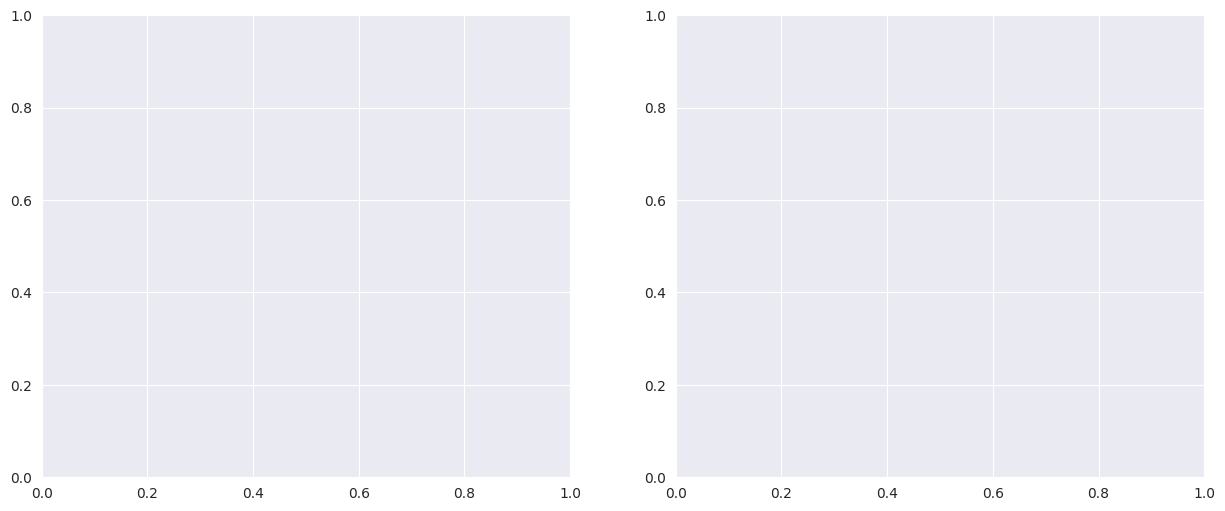

In [175]:
#Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Um layout de 1 linha e 2 colunas

In [176]:
# POINTPLOT DA VARIÁVEL EDUCACAO

# Pointplot da variável sexo
sns.pointplot(ax=axes[0], x='data_ref', y='renda', hue='educacao', data=df, dodge=True, errorbar=('ci', 95))
axes[0].set_title('Renda por Sexo ao Longo do Tempo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Renda Média')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')

/tmp/ipykernel_7117/3901028239.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


In [177]:
# Substitua o segundo gráfico com outra análise (exemplo: renda por idade)
sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')
axes[1].set_title('Renda por Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Renda Média')

/tmp/ipykernel_7117/415357461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x='idade', y='renda', data=df, ci='sd')


Text(638.5353535353535, 0.5, 'Renda Média')

In [178]:
# Layout ajustado
plt.tight_layout()
plt.show()

<Figure size 1000x2500 with 0 Axes>